In [1]:
# Loading libraries
import pandas as pd

In [2]:
# Global variables and constants
DATA_FILENAME = 'Wholesale customers data.csv'

In [3]:
data = pd.read_csv(DATA_FILENAME, index_col=False)

In [4]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [5]:
x_cols = data.columns[2:8]
print(x_cols)

Index([u'Fresh', u'Milk', u'Grocery', u'Frozen', u'Detergents_Paper',
       u'Delicassen'],
      dtype='object')


In [6]:
from sklearn.cluster import KMeans
cluster = KMeans(n_clusters=4)

In [7]:
cluster.fit(data[x_cols])

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=4, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [8]:
data['cluster'] = cluster.labels_

In [9]:
data.cluster.value_counts()

0    281
1     78
2     75
3      6
Name: cluster, dtype: int64

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [11]:
data['cluster_X'] = pca.fit_transform(data[x_cols])[:, 0]
data['cluster_y'] = pca.fit_transform(data[x_cols])[:, 1]

In [12]:
from ggplot import *
%matplotlib inline

/usr/lib/pymodules/python2.7/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


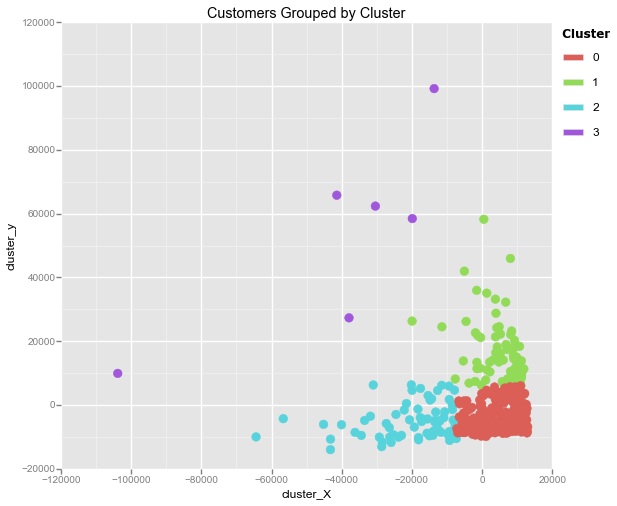

<ggplot: (8727195305649)>

In [13]:
ggplot(data, aes(x='cluster_X', y='cluster_y', color='cluster')) + \
    geom_point(size=75) + \
    ggtitle("Customers Grouped by Cluster")

In [14]:
data.groupby('cluster')[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']].mean()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
cluster,,,,,,
0,7919.120996,3363.128114,4269.120996,2698.078292,1285.804270,1053.861210
1,5398.038462,12566.794872,20461.641026,1634.064103,9087.666667,2034.666667
2,31538.173333,4522.773333,5660.666667,5329.400000,1076.693333,1963.760000
3,44741.333333,47650.000000,46396.833333,11054.666667,19492.666667,11470.333333


In [15]:
data.groupby('cluster')[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']].median()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
cluster,,,,,,
0,7149.0,2495.0,3135.0,1439.0,507.0,727.0
1,4047.0,11016.5,19026.5,1092.5,7565.0,1288.5
2,27380.0,3613.0,4757.0,3046.0,600.0,1384.0
3,36394.5,45073.5,43842.5,5518.0,22120.5,4704.5
